Question 1: Does level of education have any effect on the consumption level of cannabis?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats

In [3]:
# Create a file path
drug_consumption_clean_data = Path("/Users/lisashimano/Documents/UWA Data Analytics Bootcamp/Project 1/project_1/data/drug_consuption_clean.csv")

# Read in the data
drug_consumption_clean_df = pd.read_csv(drug_consumption_clean_data)
drug_consumption_clean_df.head()

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Impulsive,SS,Amphetamines,...,Cannabis,Cocaine,Crack,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,VSA
0,0,1,35-44 years,Female,Professional Certificate/ Diploma,United Kingdom,Mixed-White/Asian,-0.21712,-1.18084,CL2,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1,1,2,25-34 years,Male,Doctorate Degree,United Kingdom,White,-0.71126,-0.21575,CL2,...,CL4,CL3,CL0,CL4,CL0,CL2,CL2,CL3,CL0,CL0
2,2,3,35-44 years,Male,Professional Certificate/ Diploma,United Kingdom,White,-1.37983,0.40148,CL0,...,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
3,3,4,18-24 years,Female,Masters Degree,United Kingdom,White,-1.37983,-1.18084,CL0,...,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0
4,4,5,35-44 years,Female,Doctorate Degree,United Kingdom,White,-0.21712,-0.21575,CL1,...,CL3,CL0,CL0,CL1,CL0,CL0,CL0,CL0,CL2,CL0


In [4]:
# Replace drug usage information for 1 if drug has been used in the past, otherwise 0
drug_usage = {"CL0": 0, "CL1": 1, "CL2": 1, "CL3": 1, "CL4": 1, "CL5": 1, "CL6": 1}
used_drugs_df = drug_consumption_clean_df.copy()
used_drugs_df["Cannabis"] = used_drugs_df["Cannabis"].replace(drug_usage)
cannabis_counts_by_education = used_drugs_df.groupby('Education')['Cannabis'].count()
cannabis_number_by_education_total = used_drugs_df.groupby('Education')['Cannabis'].sum()
# grouped_df = used_drugs_df.groupby('Education')
print(cannabis_counts_by_education)
print(cannabis_number_by_education_total)
# print(used_drugs_df)
# Dataframe
cannabis_users = pd.DataFrame({"Total people": cannabis_counts_by_education, "Cannabis users by education": cannabis_number_by_education_total})
cannabis_users

Education
Doctorate Degree                          85
Left School Before 16 years               28
Left School at 16 years                   94
Left School at 17 years                   30
Left School at 18 years                   90
Masters Degree                           263
Professional Certificate/ Diploma        256
Some College,No Certificate Or Degree    457
University Degree                        464
Name: Cannabis, dtype: int64
Education
Doctorate Degree                          61
Left School Before 16 years               22
Left School at 16 years                   61
Left School at 17 years                   25
Left School at 18 years                   76
Masters Degree                           186
Professional Certificate/ Diploma        174
Some College,No Certificate Or Degree    426
University Degree                        335
Name: Cannabis, dtype: int64


,Total people,Cannabis users by education
Education,,
Doctorate Degree,85,61
Left School Before 16 years,28,22
Left School at 16 years,94,61
Left School at 17 years,30,25
Left School at 18 years,90,76
Masters Degree,263,186
Professional Certificate/ Diploma,256,174
"Some College,No Certificate Or Degree",457,426
University Degree,464,335


In [5]:
# Calculate the percentage for each education level group
cannabis_users['Percentage_cannabis_use'] = (cannabis_users['Cannabis users by education'] / cannabis_users['Total people']) * 100

# Display the percentage for each education level group
cannabis_users

,Total people,Cannabis users by education,Percentage_cannabis_use
Education,,,
Doctorate Degree,85,61,71.764706
Left School Before 16 years,28,22,78.571429
Left School at 16 years,94,61,64.893617
Left School at 17 years,30,25,83.333333
Left School at 18 years,90,76,84.444444
Masters Degree,263,186,70.722433
Professional Certificate/ Diploma,256,174,67.968750
"Some College,No Certificate Or Degree",457,426,93.216630
University Degree,464,335,72.198276


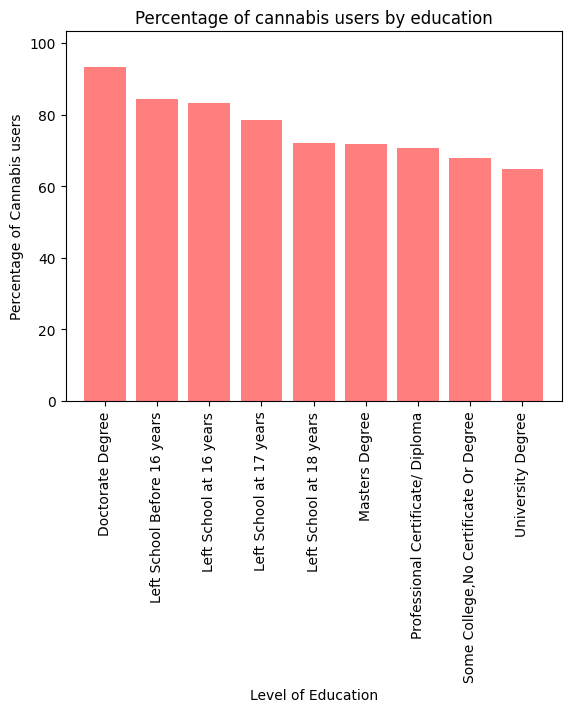

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array that contains the number of cannabis users each education level has
cannabis_users = [71.764706, 78.571429, 64.893617, 83.333333, 84.444444, 70.722433, 67.968750, 93.216630, 72.198276]
# Corresponding labels for the education levels
education_levels = ["Doctorate Degree", "Left School Before 16 years", "Left School at 16 years", 
                    "Left School at 17 years", "Left School at 18 years", "Masters Degree", 
                    "Professional Certificate/Diploma", "Some College, No Certificate or Degree", "University Degree"]

x_axis = np.arange(len(cannabis_users))

# Tell matplotlib that we will be making a bar chart
# Cannabis Users is our y axis and x_axis is, of course, our x axis

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Doctorate Degree", "Left School Before 16 years", "Left School at 16 years", "Left School at 17 years", "Left School at 18 years", "Masters Degree", "Professional Certificate/ Diploma", "Some College,No Certificate Or Degree", "University Degree"], rotation=90)

# Sort the data from high to low based on cannabis usage percentages
sorted_indices = np.argsort(cannabis_users)[::-1]  # Get sorted indices in descending order

# Use sorted indices to sort the cannabis_users array and education_levels array
sorted_cannabis_users = np.array(cannabis_users)[sorted_indices]
sorted_education_levels = np.array(education_levels)[sorted_indices]

# Create the x-axis array
x_axis = np.arange(len(sorted_cannabis_users))

# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, sorted_cannabis_users, color='r', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(cannabis_users)+10)

# Give our chart some labels and a tile
plt.title("Percentage of cannabis users by education")
plt.xlabel("Level of Education")
plt.ylabel("Percentage of Cannabis users")
plt.show()

In [7]:
import numpy as np
import pandas as pd

In [8]:
# The statistical module used to run chi square test
import scipy.stats as stats

In [9]:
# Observed data in a data of 1767 people of cannabis users for all education levels
observed = pd.Series([61, 22, 61, 25, 76, 186, 174, 426, 335], index=["Doctorate Degree", "Left School Before 16 years", "Left School at 16 years", "Left School at 17 yeaers", "Left School at 18 years", "Masters Degree", "Professional Certificate/ Diploma", "Some College,No Certificate Or Degree", "University Degree"])
observed

Doctorate Degree                          61
Left School Before 16 years               22
Left School at 16 years                   61
Left School at 17 yeaers                  25
Left School at 18 years                   76
Masters Degree                           186
Professional Certificate/ Diploma        174
Some College,No Certificate Or Degree    426
University Degree                        335
dtype: int64

In [10]:
# Create a data frame
df = pd.DataFrame([observed]).T
df

,0
Doctorate Degree,61
Left School Before 16 years,22
Left School at 16 years,61
Left School at 17 yeaers,25
Left School at 18 years,76
Masters Degree,186
Professional Certificate/ Diploma,174
"Some College,No Certificate Or Degree",426
University Degree,335


In [11]:
import pandas as pd

# Data for each education level
data = {
    'Education': ['Doctorate Degree', 'Left School Before 16 years', 'Left School at 16 years',
                  'Left School at 17 years', 'Left School at 18 years', 'Masters Degree',
                  'Professional Certificate/ Diploma', 'Some College, No Certificate Or Degree',
                  'University Degree'],
    'Total People': [85, 28, 94, 30, 90, 263, 256, 457, 464],
    'Cannabis Users by education': [61, 22, 61, 25, 76, 186, 174, 426, 335]
}

# Convert data dictionary to pandas DataFrame
df = pd.DataFrame(data)

# Calculate total population and total cannabis users
total_population = df['Total People'].sum()
total_cannabis_users = df['Cannabis Users by education'].sum()

# Calculate expected counts for cannabis users for each education level
df['Expected'] = df['Total People'] * total_cannabis_users / total_population

# Create a table with education level, observed counts, and expected counts for cannabis users
observed_expected_table = df[['Education', 'Cannabis Users by education', 'Expected']]

# Display the table
print("Observed and Expected Counts for Cannabis Users by Education Level:")
observed_expected_table

Observed and Expected Counts for Cannabis Users by Education Level:


,Education,Cannabis Users by education,Expected
0,Doctorate Degree,61,65.710243
1,Left School Before 16 years,22,21.645727
2,Left School at 16 years,61,72.667799
3,Left School at 17 years,25,23.191851
4,Left School at 18 years,76,69.575552
5,Masters Degree,186,203.315224
6,Professional Certificate/ Diploma,174,197.903792
7,"Some College, No Certificate Or Degree",426,353.289191
8,University Degree,335,358.700623


In [12]:
# The degree of freedom is 9-1=8
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95
critical_value = stats.chi2.ppf(q = 0.95, df = 8)
critical_value

15.507313055865453

In [13]:
# Calculate the chi-square
stats.chisquare(df['Cannabis Users by education'], df['Expected'])

Power_divergenceResult(statistic=23.84358063442825, pvalue=0.002434322217334347)

Since the chi-square value of 23.84 exceeds the critical value of 15.51, we conclude that the results are statistically significant. So there is difference between the two groups. P-value is lower than 0.05 so we can conclude that there is statistical difference between observed (cannabis users by education) and expected values.